In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load in data
df = pd.read_csv('mosquitos_data.csv')
df

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


In [3]:
#seperate treatments for ease of use later
beer = df[df['Treatment'] == 'Beer']
water = df[df['Treatment'] == 'Water']
beer

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


## 1. Box plot of treatments

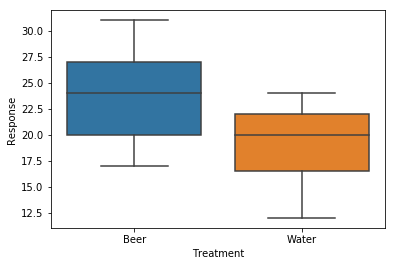

In [4]:
a = sns.boxplot(x = 'Treatment', y = 'Response', data = df)

##  2.  Q. What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitoes?


We can observe that the mean number of mosquitoes is higher for the treatment of beer, and that there is also a slightly higher range or variability for the beer treatment. There seems to be an association between beer consumption and attractiveness to mosquitoes, however, we do not yet know if it is different enough from water consumption to conclude with confidence that beer makes you more attractive to mosquitoes than water

## 3. Basic statistic measures for beer and water treatment

In [5]:
beer.describe()

,Response
count,25.000000
mean,23.600000
std,4.133199
min,17.000000
25%,20.000000
50%,24.000000
75%,27.000000
max,31.000000


In [6]:
beer.median()

Response    24.0
dtype: float64

In [7]:
water.describe()

,Response
count,18.000000
mean,19.222222
std,3.671120
min,12.000000
25%,16.500000
50%,20.000000
75%,22.000000
max,24.000000


In [8]:
water.median()

Response    20.0
dtype: float64

## 4. Explanation

The average number of mosquitoes was higher by ~4 mosquitoes for the beer treatment compared to the water treatment, with the mean number of mosquitoes for the beer treatment being 23.6 and 19.2 for water

The median value was also 4 higher in the beer treatment over water. The medians that were calculated were 24 for the beer treatment and 20 for the water treatment

The standard deviation was higher for the beer treatment (4.13) compared to the water tretment (3.67) which is consistent with what we observed from the box plot, that is, the spread of values greater for the beer treatment over the water treatment


## 5. Random Permutation Test

In [9]:
#Step 1. Shuffle Data
responses = df.Response.values
treatment = df.Treatment.values
responses

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20], dtype=int64)

In [10]:
df.Treatment.describe()

count       43
unique       2
top       Beer
freq        25
Name: Treatment, dtype: object

We have 43 samples and 25 are beer, so 18 are water. We can then split our array of shuffled and unlabled responses into two arrays of size 25 and 18 to represent beer and water respectively.

In [11]:
np.random.shuffle(responses)
responses

array([28, 19, 20, 24, 27, 24, 19, 19, 20, 18, 13, 27, 24, 28, 27, 22, 20,
       21, 17, 19, 21, 31, 20, 22, 18, 15, 23, 22, 16, 12, 29, 21, 25, 26,
       20, 24, 21, 21, 24, 20, 15, 31, 23], dtype=int64)

In [12]:
responses_beer = responses[:25]
responses_water = responses[25:]

In [13]:
responses_beer.size

25

In [14]:
responses_water.size

18

In [15]:
#Step 2. Computer difference in mean
mean_beer = responses_beer.mean()
mean_beer

21.92

In [16]:
mean_water = responses_water.mean()
mean_water

21.555555555555557

In [17]:
mean_diff = mean_beer - mean_water

In [18]:
mean_arr= []
mean_arr.append(mean_diff)
mean_arr

[0.36444444444444457]

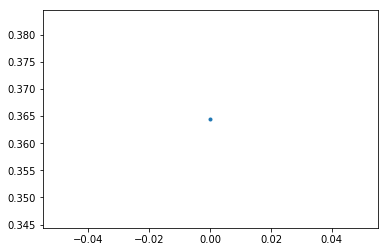

In [19]:
#Step 3. Plot it
plt.plot(mean_arr, '.')

### Putting it all together we obtain the following algorithm

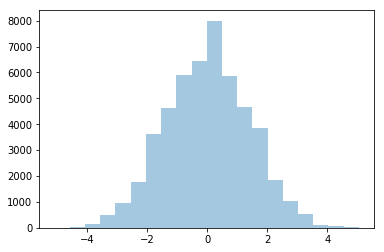

In [20]:
responses = df.Response.values
treatment = df.Treatment.values
mean_arr = []
for i in range (0, 50000):
    np.random.shuffle(responses)
    responses_beer = responses[:25]
    responses_water = responses[25:]

    mean_beer = responses_beer.mean()
    mean_water = responses_water.mean()

    mean_diff = mean_beer - mean_water

    mean_arr.append(mean_diff)
    
sns.distplot(mean_arr,bins=20, kde=False)